## Importing Libraries

In [19]:
#Importing Libraies

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

## Ingestion

In [21]:
#Creating connection
conn = sqlite3.connect('sales.db')

In [23]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Data Analyst Projects\Bike Sales Analysis\sql-data-analytics-project\Dataset\sales.csv")

In [25]:
#Ingesting sales table in database
df.to_sql('sales', conn, if_exists = 'replace', index = False)

60398

In [27]:
#Establishing cursor
c = conn.cursor()

In [73]:
#fetching data
c.execute("SELECT * FROM sales LIMIT 10")
items = c.fetchall()
for item in items:
    print(item)

('SO54496', 282, 5400, '2013-03-16', '2013-03-23', '2013-03-28', 25, 1, 25)
('SO54496', 289, 5400, '2013-03-16', '2013-03-23', '2013-03-28', 5, 1, 5)
('SO54496', 259, 5400, '2013-03-16', '2013-03-23', '2013-03-28', 2, 1, 2)
('SO54497', 174, 9281, '2013-03-16', '2013-03-23', '2013-03-28', 22, 1, 22)
('SO54497', 280, 9281, '2013-03-16', '2013-03-23', '2013-03-28', 9, 1, 9)
('SO54498', 174, 4825, '2013-03-16', '2013-03-23', '2013-03-28', 22, 1, 22)
('SO54498', 277, 4825, '2013-03-16', '2013-03-23', '2013-03-28', 54, 1, 54)
('SO54499', 289, 4286, '2013-03-16', '2013-03-23', '2013-03-28', 5, 1, 5)
('SO54499', 246, 4286, '2013-03-16', '2013-03-23', '2013-03-28', 35, 1, 35)
('SO54500', 289, 1472, '2013-03-16', '2013-03-23', '2013-03-28', 5, 1, 5)


## Queries

In [31]:
# Total sales
c.execute("SELECT SUM(sales_amount) as total_sales FROM sales;")
print(c.fetchall())

[(29356250,)]


In [33]:
# Yearly Revenue
c.execute(
    "SELECT strftime('%Y', order_date) AS year, COUNT(DISTINCT order_number) as total_orders, SUM(sales_amount) as total_revenue FROM sales GROUP BY strftime('%Y', order_date) ORDER BY 1"
)
c.fetchall()

[(None, 15, 4992),
 ('2010', 14, 43419),
 ('2011', 2216, 7075088),
 ('2012', 3269, 5842231),
 ('2013', 21287, 16344878),
 ('2014', 871, 45642)]

In [35]:
# Loading into pandas
df = pd.read_sql("SELECT * FROM sales", conn)

In [39]:
df.head()

,order_number,product_key,customer_key,order_date,shipping_date,due_date,sales_amount,quantity,price
0,SO54496,282,5400,2013-03-16,2013-03-23,2013-03-28,25,1,25
1,SO54496,289,5400,2013-03-16,2013-03-23,2013-03-28,5,1,5
2,SO54496,259,5400,2013-03-16,2013-03-23,2013-03-28,2,1,2
3,SO54497,174,9281,2013-03-16,2013-03-23,2013-03-28,22,1,22
4,SO54497,280,9281,2013-03-16,2013-03-23,2013-03-28,9,1,9


## Visualization

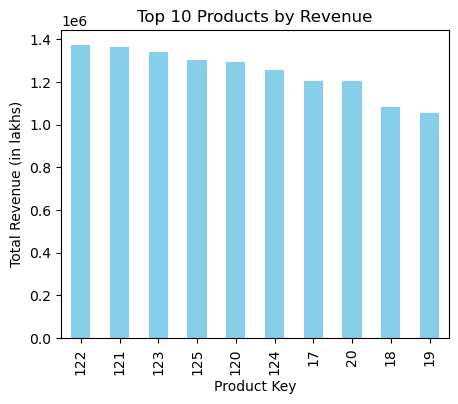

In [57]:
# Group by product key and sum revenue
top_products = df.groupby('product_key')['sales_amount'].sum().nlargest(10)

# Plot Top 10 products
plt.figure( figsize = (5,4))
top_products.plot(kind = 'bar', color = 'skyblue')

plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Revenue (in lakhs)")
plt.xlabel("Product Key")

plt.show()

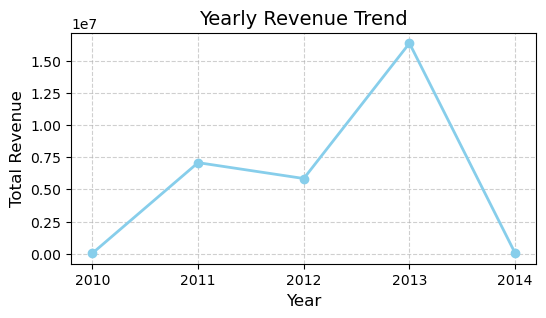

In [67]:
# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Group by year and sum revenue
yearly_sales = df.groupby(df['order_date'].dt.year)['sales_amount'].sum()

# Plot yearly revenue
plt.figure(figsize=(6, 3))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='skyblue', linewidth=2)
plt.title("Yearly Revenue Trend", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_sales.index)
plt.show()
